In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
dataset = pd.read_csv(url, header=None)

In [3]:
print(dataset.shape)

(569, 32)


In [4]:
print(dataset.head())

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9    ...        22     23      24      25      26      27      28  \
0  0.14710   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.07017   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.12790   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.10520   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.10430   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       29      30       31  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.

In [5]:
le = LabelEncoder()
le.fit(dataset[1])
dataset[1] = le.transform(dataset[1])
print(dataset.head(5))

         0   1      2      3       4       5        6        7       8   \
0    842302   1  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517   1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903   1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301   1  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402   1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9    ...        22     23      24      25      26      27      28  \
0  0.14710   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.07017   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.12790   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.10520   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.10430   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       29      30       31  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  

In [6]:
# Split-out validation dataset
array = dataset.values
# columns from 2 on are features
X = array[:,2:]
# first column is label (column 0 is ID)
y = array[:,1]
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [67]:
# define pipeline steps
estimators = [('scaling', StandardScaler()),
              ('reduce_dim', PCA(n_components=2)),
              ('clf', LogisticRegression(random_state=1))]

# create pipeline out of steps and fit on train data
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

# measure the accuracy on test data
accuracy = pipe.score(X_test, y_test)
print("Accuracy of model with PCA preprocessing measured on a test set: {}".format(accuracy))


Accuracy of model with PCA preprocessing measured on a test set: 0.9473684210526315


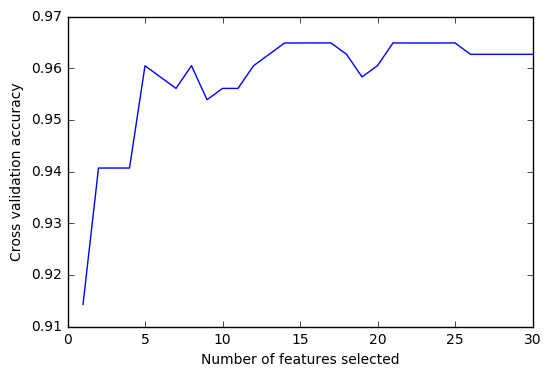

Optimal number of features : 16

Selected features:
['2 ', '5 ', '8 ', '9 ', '12 ', '14 ', '15 ', '17 ', '22 ', '23 ', '24 ', '25 ', '26 ', '28 ', '29 ', '30 ']

Accuracy of model with RFECV preprocessing measured on a test set: 0.9736842105263158


In [68]:
# define pipeline steps
estimators2 = [('scaling', StandardScaler()),
               ('feature_sel', RFECV(LogisticRegression(random_state=1), scoring='accuracy')),
               ('clf', LogisticRegression(random_state=1))]

# create pipeline out of steps and fit on train data
pipe2 = Pipeline(estimators2)
pipe2.fit(X_train, y_train)

# get access to feature selection step of the pipeline
rfecv = pipe2.named_steps['feature_sel']

#Plot number of features VS. cross-validation scores
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy")
plt.show()

print("Optimal number of features : {}".format(rfecv.n_features_))
print()

print("Selected features:")
print(["{} ".format(inx+2) for inx, selected  in enumerate(rfecv.support_) if selected == True])
print()

# measure the accuracy on test data
accuracy2 = pipe2.score(X_test, y_test)
print("Accuracy of model with RFECV preprocessing measured on a test set: {}".format(accuracy2))